Q1. This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

2. Categorical variable: For the Minnesota police use of for data, ./data/mn_police_use_of_force.csv, clean the subject_injury variable, handling the NA's; this gives a value Yes when a person was injured by police, and No when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned subject_injury variable with the force_type variable. Are there any patterns regarding when the data are missing?

3. Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [1]:
import numpy as np
import pandas as pd

In [8]:
#1
df = pd.read_csv('airbnb_hw.csv')
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
#Checking current state of price column
print(df['Price'].unique())

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [6]:
# Remove dollar signs and commas
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [7]:
#Check for missing values (NANs)
missing_values_count = df['Price'].isnull().sum()
print(missing_values_count)

0


In [9]:
#2
df = pd.read_csv('mn_police_use_of_force.csv')
df.head(5)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [12]:
#Cleaning subject_injury variable
df['subject_injury'] = df['subject_injury'].fillna('No')

In [13]:
#Calculate proportion of missing values
missing_proportion = df['subject_injury'].isnull().mean()
print(missing_proportion)

0.0


In [15]:
#Create cross-tabulate variable with "force_type"
crosstab_result = pd.crosstab(df['subject_injury'], df['force_type'])
print(crosstab_result)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          33   1135  
Yes                         44    172  


In [16]:
#3
df = pd.read_parquet('justice_data.parquet')
df.head(5)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [21]:
print(df['WhetherDefendantWasReleasedPretrial'].unique())
print(df['WhetherDefendantWasReleasedPretrial'].isnull().sum())

[9 0 1]
0


In [18]:
#Identify missing values (NANs)
missing_values = df['WhetherDefendantWasReleasedPretrial'].isnull().sum()
print(missing_values)

0


In [22]:
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace([None], np.nan)

In [83]:
dummies = pd.get_dummies(df['WhetherDefendantWasReleasedPretrial'], prefix='released')
df = pd.concat([df, dummies], axis=1)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,species_split,injury
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Minor, bite, to, lower, body]",Minor bite to lower body
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[None, -, chunk, of, surfboard, bitten, out]",None - chunk of surfboard bitten out
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Bitten, on, the, arm]",Bitten on the arm
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Severe, arm, injury, and, delay, in, medical,...",Severe arm injury and delay in medical treatme...
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Body, not, recovered]",Body not recovered


In [25]:
#4
print(df['ImposedSentenceAllChargeInContactEvent'].unique())

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [20]:
#Check for missing values (NANs)
missing_values = df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()
print(missing_values)

0


In [28]:
#Looking at 'SentenceTypeAllChargesAtConvictionInContactEven' variable
sentence_type_distribution = df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts()
print(sentence_type_distribution)

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64


Q2. Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.

2. Drop any columns that do not contain data.

3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

4. Clean the Age variable and make a histogram of the ages of the victims.

5. What proportion of victims are male?

6. Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

7. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

9. What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [29]:
df = pd.read_excel('GSAF5.xls')
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.dropna(axis=1, how='all', inplace=True)

In [34]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [35]:
year_range = df['Year'].describe()
print(year_range)

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64


In [37]:
df_filtered = df[df['Year'] >= 1940]
print(df_filtered)

                     Date    Year        Type           Country  \
0     2025-01-23 00:00:00  2025.0  Unprovoked         Australia   
1     2025-01-22 00:00:00  2025.0  Unprovoked         Australia   
2     2025-01-11 00:00:00  2025.0    Provoked               USA   
3     2025-01-02 00:00:00  2025.0  Unprovoked     New Caledonia   
4     2025-01-02 00:00:00  2025.0  Unprovoked         Australia   
...                   ...     ...         ...               ...   
5455                 1940  1940.0  Unprovoked        NEW GUINEA   
5456                 1940  1940.0  Unprovoked  PAPUA NEW GUINEA   
5457                 1940  1940.0     Invalid      SOUTH AFRICA   
5458                 1940  1940.0     Invalid      SOUTH AFRICA   
5459                 1940  1940.0     Invalid      SOUTH AFRICA   

                      State                                 Location  \
0         Western Australia                           Shipwreck Cove   
1         Western Australia                        

<Axes: xlabel='Year'>

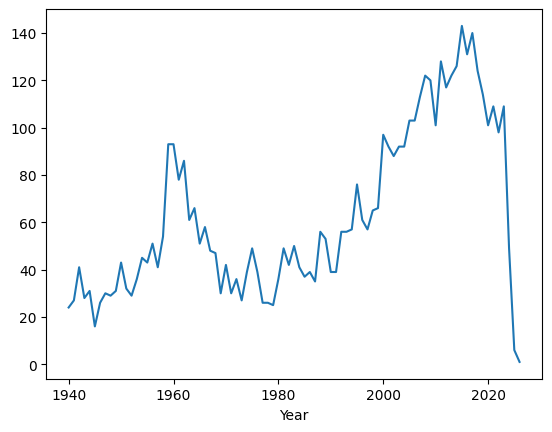

In [42]:
#Based on the plot, attacks are increasing from 1940 to 1960, decreasing from 1960 to 1980 and increasing from 1980 to 2020
attacks_per_year = df_filtered.groupby('Year').size()
attacks_per_year.plot(kind='line')

In [45]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

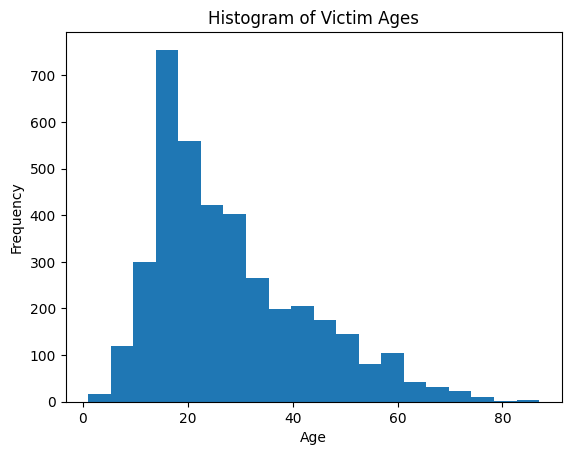

In [46]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=20)
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [47]:
male_count = df[df['Sex'] == 'M'].shape[0]
total_count = df.shape[0]
proportion_male = male_count / total_count

print(proportion_male)

0.8027745995423341


In [49]:
df['Type'] = df['Type'].replace({'Provoked Attack': 'Provoked',
                                      'Unprovoked Attack': 'Unprovoked',
                                      'Unknown': 'Unknown'})
print(df['Type'].head())

0    Unprovoked
1    Unprovoked
2      Provoked
3    Unprovoked
4    Unprovoked
Name: Type, dtype: object


In [50]:
unprovoked_count = df[df['Type'] == 'Unprovoked'].shape[0]
total_attacks = df.shape[0]
proportion_unprovoked = unprovoked_count / total_attacks
print(proportion_unprovoked)

0.7369851258581236


In [51]:
df['Fatal Y/N'] = df['Fatal Y/N'].replace({'Yes': 'Y',
                                                'No': 'N',
                                                'Unknown': 'Unknown'})
print(df['Fatal Y/N'].head())

0    N
1    N
2    N
3    Y
4    Y
Name: Fatal Y/N, dtype: object


In [52]:
#Calculating unprovoked attacks on men and women
gender_counts = df[df['Type'] == 'Unprovoked']['Sex'].value_counts()
print(gender_counts)

Sex
M      4311
F       670
M         2
 M        1
lli       1
Name: count, dtype: int64


In [53]:
#Analyzing fatality rates when attack is provoked or unprovoked
fatal_provoked = df[df['Type'] == 'Provoked']['Fatal Y/N'].value_counts(normalize=True)
fatal_unprovoked = df[df['Type'] == 'Unprovoked']['Fatal Y/N'].value_counts(normalize=True)

print(fatal_provoked)
print(fatal_unprovoked)

Fatal Y/N
N          0.955766
Y          0.031596
UNKNOWN    0.004739
 N         0.003160
n          0.001580
M          0.001580
2017       0.001580
Name: proportion, dtype: float64
Fatal Y/N
N          0.743185
Y          0.243575
UNKNOWN    0.011098
 N         0.000974
F          0.000389
M          0.000195
Nq         0.000195
N          0.000195
y          0.000195
Name: proportion, dtype: float64


In [55]:
#Analyzing fatality rates based on gender
fatal_gender_male = df[df['Sex'] == 'M']['Fatal Y/N'].value_counts(normalize=True)
fatal_gender_female = df[df['Sex'] == 'F']['Fatal Y/N'].value_counts(normalize=True)

print(fatal_gender_male)
print(fatal_gender_female)

Fatal Y/N
N          0.751635
Y          0.238361
UNKNOWN    0.006926
 N         0.001154
F          0.000770
M          0.000577
n          0.000192
2017       0.000192
y          0.000192
Name: proportion, dtype: float64
Fatal Y/N
N          0.826685
Y          0.165062
UNKNOWN    0.005502
Nq         0.001376
 N         0.001376
Name: proportion, dtype: float64


In [79]:
df['injury'] = df['Injury']
injury_list = df['injury'].str.split()

white_shark_attacks = 0
for i in injury_list:
        white_shark_attacks += 1

proportion_white_shark_attacks = white_shark_attacks / len(df)
print(proportion_white_shark_attacks)

1.0


Q3. Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

1. Read the abstract. What is this paper about?
- The paper discusses the principles and importance of data tidying in the context of data analysis. It emphasizes that tidy datasets, which have a specific structure where each variable is represented as a column, each observation as a row, and each type of observational unit as a separate table, facilitate easier manipulation, modeling, and visualization of data. The paper argues that having a consistent data structure allows for the development of tools that can efficiently handle un-tidy datasets with minimal effort.

2. Read the introduction. What is the "tidy data standard" intended to accomplish?
- The “tidy data standard” aims to create a standardized way of organizing data values within a dataset. This standardization simplifies the initial data cleaning process, prevents reinventing the wheel for each new dataset, and facilitates easier data exploration, analysis, and the development of compatible data analysis tools. Essentially, it's intended to make data easier and more efficient to work with, analyze, and share by creating a consistent structure.


3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
- The first sentence is an analogy used to illustrate the concept of tidy data. It highlights that while tidy datasets adhere to a consistent structure, messy datasets can be disorganized in a multitude of different ways. Just as there's a commonality to happy families but infinite variations in unhappy ones, tidy datasets share a uniform structure, whereas messy datasets lack this consistency and can deviate in various unpredictable ways. This emphasizes the importance of a standardized approach (tidying) to data organization for effective analysis.

- The second sentence highlights the seemingly straightforward yet conceptually complex nature of distinguishing between variables and observations in data analysis. In a specific dataset, the roles of variables (characteristics being measured) and observations (individual instances or subjects) are often clear from the context and table structure. However, providing a universally applicable, precise definition that works across all datasets and contexts is surprisingly challenging. Based on the example given in the paper, comparing "height and weight" versus "height and width" or "home phone and work phone", illustrates how the interpretation of variables and observations can depend on the research question and how the data are organized.Sometimes, what appears to be a single variable ("dimension") might be represented by multiple columns in a dataset ("height" and "width"), blurring the lines between variables and their constituent parts.

4. Read Section 2.2. How does Wickham define values, variables, and observations?

- Values: These are the individual entries within the dataset. They are either numerical (quantitative) or text-based (qualitative). Every value belongs to a variable and an observation

- Variables: A variable constitutes all values that measure the same attribute across different observations. For example, the "height" variable would contain the height measurements (i.e., values) for all individuals in the dataset.

- Observations: An observation contains all values measured on the same unit. For example, one person's height, weight, and age would constitute a single observation.

5. How is "Tidy Data" defined in section 2.3?
- In section 2.3, “Tidy Data” is a standard way of mapping the meaning of a dataset to its structure.Three rules govern Tidy Data:

  a) Each variable forms a column: Every piece of attribute being measured (e.g., height, weight, age) gets its own column.

  b) Each observation forms a row: Each individual measurement or data point gets its own row (e.g., each person’s age, religion, income is on a row).

  c) Each type of observational unit forms a table: If you have different types of data (e.g., information about people and information about their pets), each type should be in a separate table.This structure makes data easier to analyze and work with using statistical software. Any data that doesn't follow these rules is considered "messy" data.

6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
- The 5 most common problems with messy datasets are:

  a) Column headers are values, not variable names.

  b) Multiple variables are stored in one column.

  c) Variables are stored in both rows and columns.

  d) Multiple types of observational units are stored in the same table.

  e) A single observational unit is stored in multiple tables.

- The data in Table 4 are messy because they violate two principles of “Tidy Data” advocated by Hadley Wickham (i.e., Each variable forms a column, and Each observation forms a row), and contains one of the common problems with messy data (i.e., Column headers are values, not variable names).

  a) Each variable forms a column: Every piece of attribute being measured (e.g., income, height, weight, age) gets its own column. However, Table 4 is messy because all columns are measuring the same attribute (income) and each cell contains multiple observations as income is presented as a range. The data is wide rather than long.

  b) Each observation forms a row: Each single observation forms a row (e.g., a person, pet). To the contrary, Table 4 does not represent individual observations directly; instead, it provides aggregate counts of individuals within each income bracket and religious group. Again, each row contains multiple observations, and can make it difficult to clean and analyze the data.

  c) Column headers are values, not variable names: This common problem is evident in Table 4 where column headers values, both qualitative (such as Religion) and quantitative (in this case income ranges in dollars). This is contrary to “Tidy Data” principles where every value belongs to a variable and an observation; so values do not form column headers.

- Melting a dataset is the process of transforming a dataset from a wide format (where multiple variables are spread across columns) and converts it into a long, narrow format where each row represents a single observation and a single variable. This long format is much more suitable for many data analysis functions and machine learning algorithms. With reference to Table 4 provided in the assigned reading, it is in a wide format in that each row contains multiple observations aggregated together. To tidy Table 4, we need to melt it so that it is transformed into a long, narrow format where each row represents a single observation and a single variable.(See my restructured Table 4 above).

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
- Table 11 is messy because it violates several tidy data principles which are having each variable in a column, each observation in a row, and each type of observational unit in a table. These principles are violated in the following ways:

  a) Variables in multiple columns: The daily temperature readings (d1, d2, d3, etc.) represent the same variable (daily temperature) spread across multiple columns. A tidy format would have separate columns for “day”, “tmax”, and “tmin”. Doing so would not only make Table align with the principles of Tidy Data.

  b) Multiple variables in a single column: The "month" column likely contains both month number and year information, potentially violating the "one variable per column" rule.

  c) Lack of clarity on data structure: The table's design does not clearly delineate the relationship between observations and variables, making it difficult to analyze and understand. A clear structure with distinct columns for each variable would improve readability and analysis capabilities. Each row would represent a single daily temperature observation.

- Table 12 is tidy and “molten” because the “molten” dataset violates the first principle of “Tidy Data (i.e., Each variable forms a column) because daily temperature data (tmax and tmin) are stored in a single value column, along with a element column specifying which type of temperature each value represents. This makes analysis increasingly difficult. By contrast, the "tidy" dataset adheres to all three principles. Each variable (day, tmin, tmax) is a separate column, each row represents a single day's observations, and each cell contains a single value. This structure makes data analysis and manipulation much easier.

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

- The chicken-and-egg problem with tidy data is: “if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data” (page 20). Right now, it apears tools for data wrangling are often designed to work with specific data structures, making it difficult to create general-purpose tools that can handle all types of messy data. This highlights the difficulty of developing universally applicable data wrangling tools. Wickham hopes that future work will utilize methodologies from other disciplines such as user-testing, ethnography,and talk-aloud protocols to improve our understanding of the cognitive side of data analysis, and to further improve the design of appropriate Tidy Data tools that can handle diverse messy datasets such as those multidimensional arrays, paving the way for a world where tidy data is the norm. The core idea is to establish a universal format for datasets (i.e.,Tidy Data Standard). This consistency would greatly improve data analysis, reproducibility, and sharing.

Q4. Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?